# Annotation Statistics

## Reorder Annotations

In [1]:
import json

with open('annotations.json', 'r') as f:
    examples = json.load(f)
    
sorted_examples = list(sorted(examples, key=lambda d: d["id"]))

with open('annotations.json', 'w') as f:
    f.write(json.dumps(sorted_examples, indent=4))

## Get Statistics

In [3]:
images = []
choices = []
labels = []
correct = []
correct_pairs = []
for example in sorted_examples:
    # get image names
    image_0 = example["data"]["generated_image_0"].split("/")[-1]
    image_1 = example["data"]["generated_image_1"].split("/")[-1]
    images.extend([image_0, image_1])
    
    # get choices
    result = example["annotations"][0]["result"]
    choice_0 = result[0]["value"]["choices"][0]
    choice_1 = result[1]["value"]["choices"][0]
    choices.extend([choice_0, choice_1])
    
    # check if choices are correct
    caption_image_0 = 'Caption 0' if int(image_0[-11]) == 0 else 'Caption 1'
    caption_image_1 = 'Caption 0' if int(image_1[-11]) == 0 else 'Caption 1'
    labels.extend([caption_image_0, caption_image_1])
    correct_0 = choice_0 == caption_image_0
    correct.append(correct_0)
    correct_1 = choice_1 == caption_image_1
    correct.append(correct_1)
    correct_pairs.append(correct_0 and correct_1)

print("Total number of images:", len(images))
print("Total number of pairs:", len(correct_pairs))
print()

print("Selected option counts:")
options = set(choices)
for option in options:
    print(option, choices.count(option))
    
print()
print("Number of correct and incorrect images:")
print("Correct", correct.count(True))
print("Incorrect", correct.count(False))

print()
print("Number of correct and incorrect pairs:")
print("Correct", correct_pairs.count(True))
print("Incorrect", correct_pairs.count(False))

Total number of images: 600
Total number of pairs: 300

Selected option counts:
Caption 1 113
Both 25
None 351
Caption 0 111

Number of correct and incorrect images:
Correct 130
Incorrect 470

Number of correct and incorrect pairs:
Correct 23
Incorrect 277


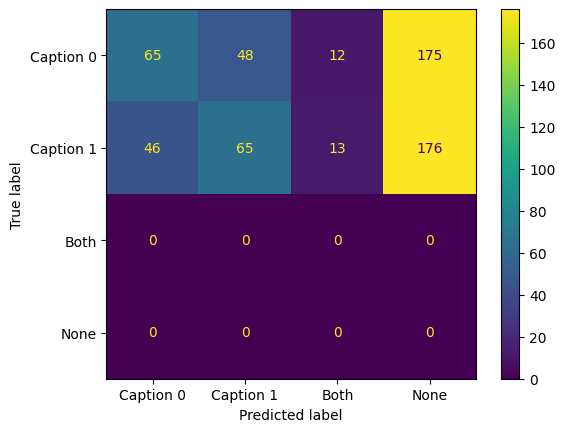

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
options = ["Caption 0", "Caption 1", "Both", "None"]
cm = confusion_matrix(labels, choices, labels=options)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=options)
disp.plot()